In [8]:
import os
from os.path import exists
import ecg_plot
from pathlib import Path
import pandas as pd
import math
import scipy
import matplotlib.pyplot as plt

#standard imports

In [1]:
#path = '/Users/prakashperimbeti/desktop/AAI-USD/AAI-530/finalproject/epicardially-attached-cardiac-accelerometer-data-from-canines-and-porcines-1.0.0/accelerometer_data'
path = './prakash/iot/finalproject/.'

#%cd /Users/prakashperimbeti/desktop/AAI-USD/AAI-530/finalproject/epicardially-attached-cardiac-accelerometer-data-from-canines-and-porcines-1.0.0/accelerometer_data
%cd /home/bear/prakash/iot/finalproject/epicardially-attached-cardiac-accelerometer-data-from-canines-and-porcines-1.0.0/accelerometer_data
%ls

/home/bear/prakash/iot/finalproject/epicardially-attached-cardiac-accelerometer-data-from-canines-and-porcines-1.0.0/accelerometer_data
AP/  MKCMS/  MV/                       consolidated_ep_data.csv.old
MK/  MP/     consolidated_ep_data.csv


In [4]:
dfFinal = pd.read_csv("./consolidated_ep_data.csv")

In [5]:
onedf = dfFinal[(dfFinal['identifier'] == 'AP105') & (dfFinal['intervention'] == 'baseline')]
print(onedf.shape)
onedf.head(5)

(14932, 15)


,Unnamed: 0,experiment_name,animal_species,sample_rate,intervention,identifier,acc_x,acc_y,acc_z,lvp,ecg,magnitude,velocity,timesecs,contractility
2469050,0,AP,pig,500,baseline,AP105,0.012928,-0.160475,0.000829,7.702694,-0.089851,0.160997,0.000317,0.002,0.015470
2469051,1,AP,pig,500,baseline,AP105,0.009991,-0.154817,-0.018699,7.767617,-0.317959,0.156262,0.000307,0.004,0.015603
2469052,2,AP,pig,500,baseline,AP105,0.011690,-0.150582,0.000728,7.834910,-0.127869,0.151037,0.000298,0.006,0.015739
2469053,3,AP,pig,500,baseline,AP105,0.028389,-0.144931,-0.004296,7.904132,-0.115196,0.147748,0.000286,0.008,0.015879
2469054,4,AP,pig,500,baseline,AP105,0.015751,-0.137861,-0.005365,7.974890,-0.153214,0.138862,0.000277,0.010,0.016022


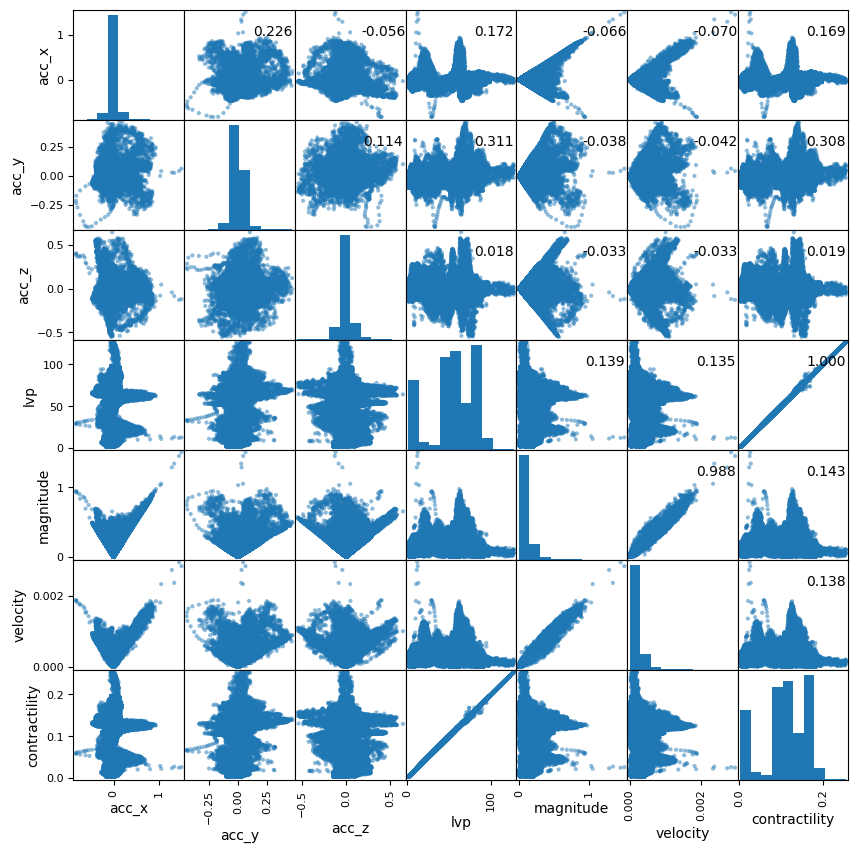

In [21]:
dfcorr = dfFinal[0:145000]
axes = pd.plotting.scatter_matrix(dfcorr[['acc_x', 'acc_y', 'acc_z', 'lvp', 'magnitude', 'velocity', 'contractility']], alpha=0.5,figsize = [10,10])
corr = dfcorr[['acc_x', 'acc_y', 'acc_z', 'lvp', 'magnitude', 'velocity', 'contractility']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [6]:
def drawAllFive(df):
    start = 0
    end = 0
    i = 0
    mag = []
    dflvp =  onedf[300:2299]
    vel_1 = dflvp['velocity']
    mag = dflvp['magnitude']
    cat = dflvp['contractility']
    ecg = dflvp['ecg']
    lvp = dflvp['lvp']

    # Plotting all seven moving averages plots
    fig, (ax1,ax2, ax3,  ax4, ax5) = plt.subplots(5, 1, figsize = (10, 10))

    ax1.plot(mag, color='red')
    ax2.plot(ecg, color='blue')
    ax3.plot(lvp, color='brown')
    ax4.plot(cat, color='black')
    ax5.plot(vel_1, color='pink')

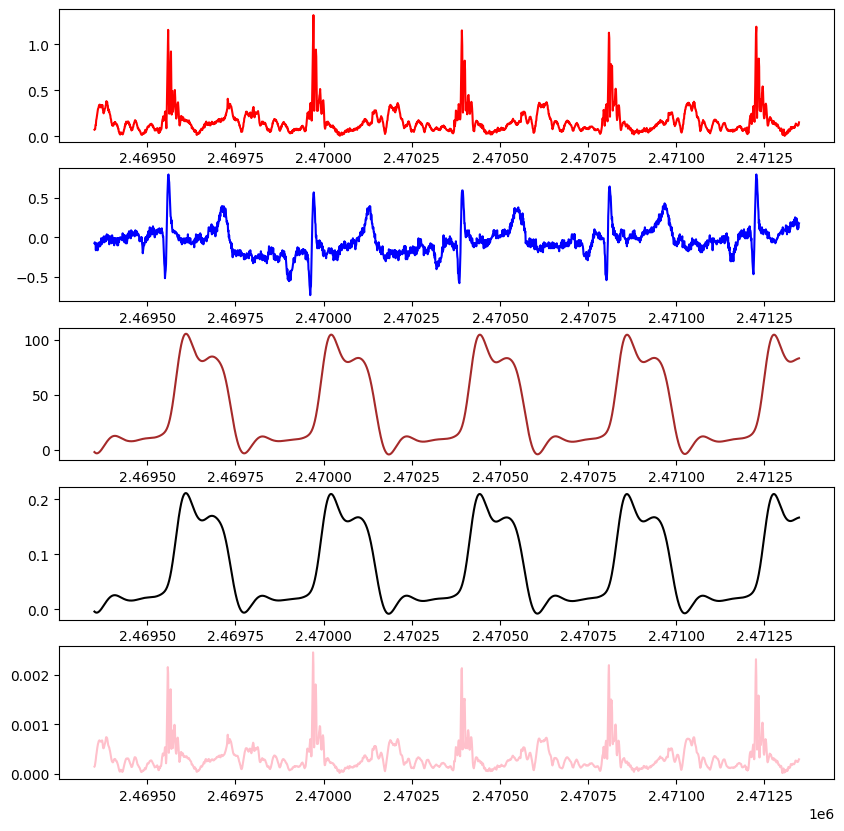

In [9]:
drawAllFive(onedf)

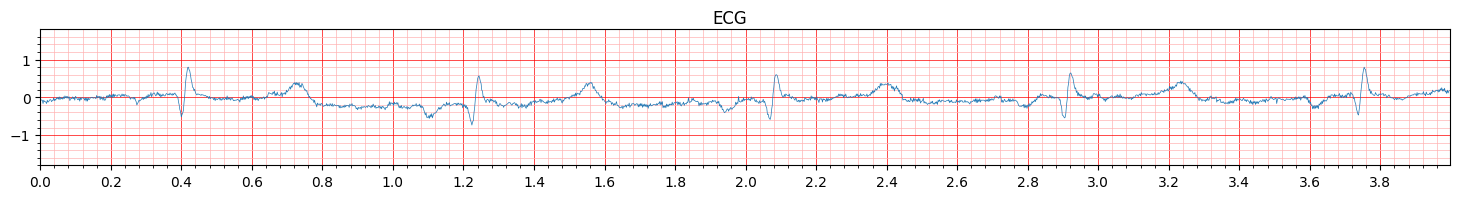

In [10]:
dtmp = onedf[300:2299]
ecg_plot.plot_1(dtmp['ecg'], title = 'ECG', sample_rate=500)
ecg_plot.show()


Text(0.5, 1.0, 'ECG')

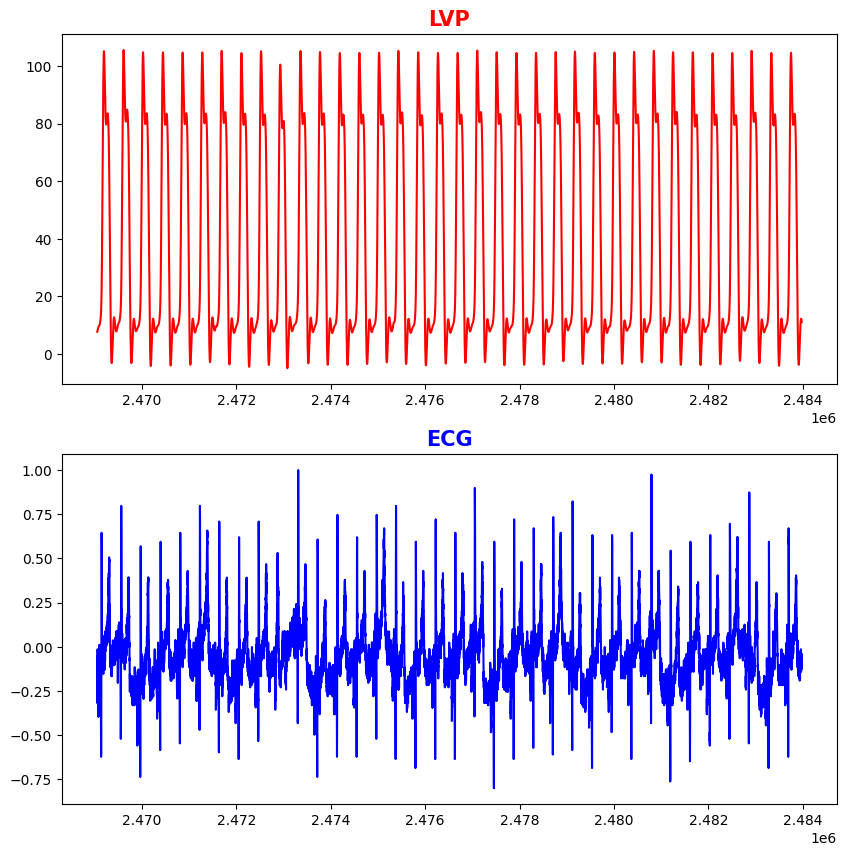

In [11]:
import matplotlib.pyplot as plt

# P;otting all seven moving averages plots
fig, (axs0,axs1) = plt.subplots(2, 1, figsize = (10, 10))

axs0.plot(onedf['lvp'], color='red')
axs0.set_title("LVP", fontweight = 'bold', size = 15, color='red')
axs1.plot(onedf['ecg'], color='blue')
axs1.set_title("ECG", fontweight = 'bold', size = 15, color='blue')

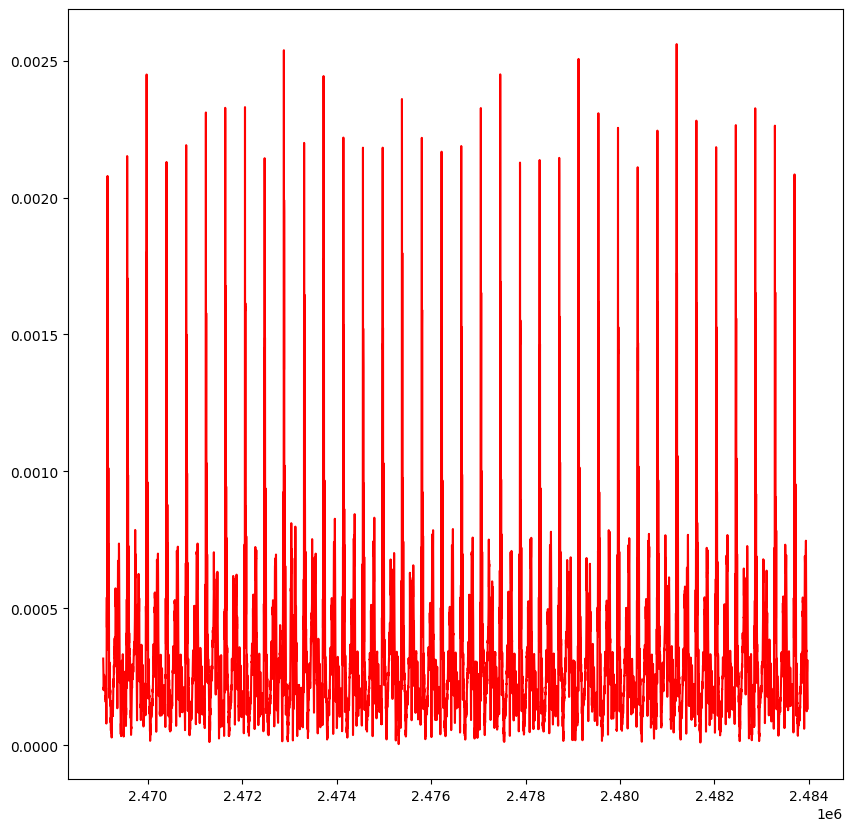

In [12]:
import matplotlib.pyplot as plt

# P;otting all seven moving averages plots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

ax.plot(onedf['velocity'], color='red')


In [16]:
#read one file to verify the dataframe reflexts the same
file = './AP/AP105/baseline/AP105_baseline_b_000.json'
dftwo = pd.read_json(file)
print(dftwo.shape)
dftwo.head(5)

(14932, 10)


,experiment_name,animal_species,sample_rate,intervention,identifier,acc_x,acc_y,acc_z,lvp,ecg
0,AP,pig,500,baseline,AP105,0.012928,-0.160475,0.000829,7.702694,-0.089851
1,AP,pig,500,baseline,AP105,0.009991,-0.154817,-0.018699,7.767617,-0.317959
2,AP,pig,500,baseline,AP105,0.011690,-0.150582,0.000728,7.834910,-0.127869
3,AP,pig,500,baseline,AP105,0.028389,-0.144931,-0.004296,7.904132,-0.115196
4,AP,pig,500,baseline,AP105,0.015751,-0.137861,-0.005365,7.974890,-0.153214


In [19]:
dfFinal.shape

(3614763, 15)

In [ ]:
#splitting